<a href="https://colab.research.google.com/github/Tristan-Brown1096/DS18_Unit_1_Build_Week_Project/blob/master/unit_1_build_week_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#creating main DataFrame
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
#checking summary statistics of DataFrame
print(df.shape)
df.describe()

(41586, 9)


,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [4]:
#adding column with useful additional information
df['goal_difference'] = df['home_score'] - df['away_score']
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [5]:
df['winning_team'] = np.where(df['home_score'] > df['away_score'], df['home_team'],
                              np.where(df['home_score'] < df['away_score'], df['away_team'], 'Tie'))
df['losing_team'] = np.where(df['home_score'] > df['away_score'], df['away_team'],
                              np.where(df['home_score'] < df['away_score'], df['home_team'], 'Tie'))
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference,winning_team,losing_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,Tie,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,Tie,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland,England


In [6]:
df['winning_team'].value_counts().head(11)

Tie            9578
Brazil          625
England         572
Germany         555
Argentina       526
Sweden          500
South Korea     454
Mexico          439
Hungary         434
Italy           423
France          417
Name: winning_team, dtype: int64

In [7]:
df['losing_team'].value_counts().head(11)

Tie                 9578
Finland              400
Switzerland          344
Northern Ireland     332
Norway               328
Luxembourg           317
Chile                310
Wales                307
Sweden               293
Hungary              292
Uruguay              286
Name: losing_team, dtype: int64

In [8]:
#creating columns to use to divide DataFrame
df['home_win'] = np.where(df['home_score'] > df['away_score'], True, False)
df['friendly'] = np.where(df['tournament'] == 'Friendly', True, False)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference,winning_team,losing_team,home_win,friendly
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,Tie,Tie,False,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,England,Scotland,True,True
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,Scotland,England,True,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,Tie,Tie,False,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland,England,True,True


In [9]:
#creating first subset DataFrame
home = df[df['neutral'] == False]
home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference,winning_team,losing_team,home_win,friendly
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,Tie,Tie,False,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,England,Scotland,True,True
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,Scotland,England,True,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,Tie,Tie,False,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland,England,True,True


In [10]:
#creating second subset DataFrame to compare
neutral = df[df['neutral'] == True]
neutral.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference,winning_team,losing_team,home_win,friendly
68,1890-02-08,Wales,Northern Ireland,5,2,British Championship,Shrewsbury,England,True,3,Wales,Northern Ireland,True,False
264,1910-05-29,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,True,-3,Uruguay,Chile,False,True
328,1912-07-03,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,1,Norway,Russia,True,True
431,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,-4,Uruguay,Chile,False,False
434,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,0,Tie,Tie,False,False


In [11]:
#creating third subset DataFrame
#separate comparison from first two
friendly = df[df['friendly'] == True]
friendly.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference,winning_team,losing_team,home_win,friendly
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,Tie,Tie,False,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,England,Scotland,True,True
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,Scotland,England,True,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,Tie,Tie,False,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland,England,True,True


In [12]:
#creating final subset DataFrame to compare to subset three
competitive = df[df['friendly'] == False]
competitive.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference,winning_team,losing_team,home_win,friendly
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,-5,Scotland,Northern Ireland,False,False
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6,Wales,Northern Ireland,True,False
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,-7,England,Northern Ireland,False,False
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1,Scotland,England,True,False
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,-4,England,Wales,False,False


In [13]:
#defining function for confidence interval
def confidence_interval(sample, confidence_level = 0.95):
  data = np.array(sample)

#standard deviation
  s = np.std(data, ddof=1)
#observations
  n = data.shape[0]
#mean
  m = np.mean(data)
#t-statistic
  t = stats.t.ppf((1-((1 - confidence_level) / 2)), n-1)

#standard error
  se = s / np.sqrt(n)
#margin of error
  moe  = t * se

#upper and lower bounds of the confidence interval
  ub = m + moe
  lb = m - moe
  
  return (lb, m, ub, moe)

##Home Games vs Neutral Games: Win Rate
1) Null Hypothesis:

$H_0: \overline{x}_h == \overline{x}_n$

The home team of non-neutral site games wins as often as the home team of a neutral site game.

2) Alternative Hypothesis:

$H_0: \overline{x}_h \neq \overline{x}_n$

There is a significant difference in the win rate of home teams of non-neutral site games and home teams of neutral site games.

3) Confidence Interval:

95%

In [14]:
ts1, pv1 = stats.ttest_ind(home['home_win'], neutral['home_win'])
print('T-statistic:', ts1)
print('P-value:', pv1)

T-statistic: 13.098271622803649
P-value: 4.026778134775794e-39


4) Conclusion:

Based on a t-statistic of 13.098 and a p-value of 4.027e-39, we can reject the null hypothesis and suggest the alternative hypothesis that teams playing at home are significantly more likely to win than the designated home team of a neutral site game.

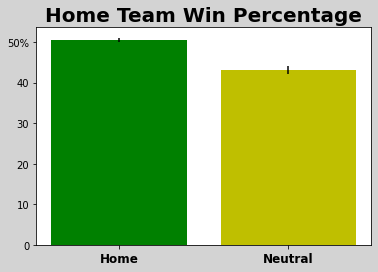

In [15]:
ci1 = confidence_interval(home['home_win'])
ci2 = confidence_interval(neutral['home_win'])

fig, ax = plt.subplots()

plt.style.use('ggplot')

plt.bar(0, height=ci1[1], yerr=ci1[3], color='g')
plt.bar(1, height=ci2[1], yerr=ci2[3], color='y')

ax.set_yticklabels([0, 10, 20, 30, 40, '50%'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Home', 'Neutral'], fontsize=12, fontweight='bold')

fig.set_facecolor('lightgrey')

ax.set_title('Home Team Win Percentage', fontsize=20, fontweight='bold')

plt.show()

##Home Games vs Neutral Games: Goals Scored
1) Null Hypothesis:

$H_0: \overline{x}_h == \overline{x}_n$

The home team of non-neutral site games scores a similar number of goals as the home team of a neutral site game.

2) Alternative Hypothesis:

$H_0: \overline{x}_h \neq \overline{x}_n$

There is a significant difference in the number of goals scored by home teams of non-neutral site games and home teams of neutral site games.

3) Confidence Interval:

95%

In [16]:
ts2, pv2 = stats.ttest_ind(home['home_score'], neutral['home_score'])
print('T-statistic:', ts2)
print('P-value:', pv2)

T-statistic: 6.600400232422407
P-value: 4.149666047962466e-11


4) Conclusion:

Based on a t-statistic of 6.60 and a p-value of 4.15e-11, we can reject the null hypothesis and suggest the alternative that teams playing at home score significantly more goals than the designated home team of a neutral site game.

##Home Games vs Neutral Games: Goal Difference
1) Null Hypothesis:

$H_0: \overline{x}_h == \overline{x}_n$

The home team of non-neutral site games wins by a similar margin as the home team of a neutral site game.

2) Alternative Hypothesis:

$H_0: \overline{x}_h \neq \overline{x}_n$

There is a significant difference in the winning margin of home teams of non-neutral site games and home teams of neutral site games.

3) Confidence Interval:

95%

In [17]:
ts3, pv3 = stats.ttest_ind(home['goal_difference'], neutral['goal_difference'])
print('T-statistic:', ts3)
print('P-value:', pv3)

T-statistic: 15.057529652735301
P-value: 4.203223568467029e-51


4) Conclusion:

Based on a t-statistic of 15.06 and a p-value of 4.20e-51, we can reject the null hypothesis and suggest the alternative hypothesis that teams playing at home win by a significantly larger margin than the designated home team of a neutral site game.

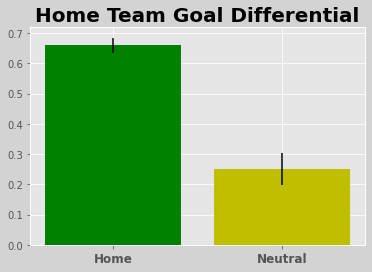

In [18]:
ci3 = confidence_interval(home['goal_difference'])
ci4 = confidence_interval(neutral['goal_difference'])

fig, ax = plt.subplots()

plt.style.use('ggplot')

plt.bar(0, height=ci3[1], yerr=ci3[3], color='g')
plt.bar(1, height=ci4[1], yerr=ci4[3], color='y')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Home', 'Neutral'], fontsize=12, fontweight='bold')

fig.set_facecolor('lightgrey')

ax.set_title('Home Team Goal Differential', Fontsize=20, fontweight='bold')

plt.show()

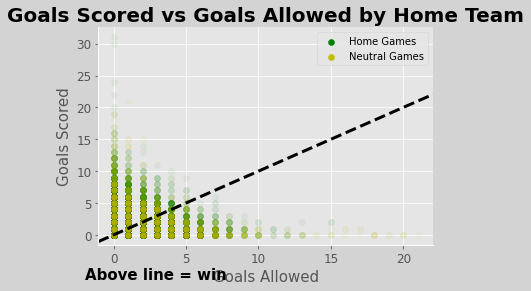

In [19]:
#graphing differences in goals scored vs goals allowed of neutral and non-neutral site games
fig, ax = plt.subplots()

plt.style.use('ggplot')

plt.scatter(home['away_score'], home['home_score'], alpha=0.05, c='g', label='Home Games')
plt.scatter(neutral['away_score'], neutral['home_score'], alpha=0.05, c='y', label='Neutral Games')

xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

ax.set_yticklabels([-5, 0, 5, 10, 15, 20, 25, 30], fontsize=12)
ax.set_ylabel('Goals Scored', fontsize=15)

ax.set_xticklabels([-5, 0, 5, 10, 15, 20], fontsize=12)
ax.set_xlabel('Goals Allowed', fontsize=15)

fig.set_facecolor('lightgrey')

legend = plt.legend(loc='upper right')
for handle in legend.legendHandles:
  handle.set_alpha(1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Goals Scored vs Goals Allowed by Home Team', fontsize=20, fontweight='bold')
ax.text(-2, -7, 'Above line = win', fontsize=15, fontweight='bold')

plt.show()

##Competitive Games vs Friendly Games: Win Rate

1)1) Null Hypothesis:

$H_0: \overline{x}_c == \overline{x}_f$

The home team of competitive games wins as often as the home team of a friendly game.

2) Alternative Hypothesis:

$H_0: \overline{x}_c \neq \overline{x}_f$

There is a significant difference in the win rate of home teams of competitive  games and home teams of friendly games.

3) Confidence Interval:

95%

In [20]:
ts4, pv4 = stats.ttest_ind(competitive['home_win'], friendly['home_win'])
print('T-statistic:', ts4)
print('P-value', pv4)

T-statistic: 5.600318747017765
P-value 2.1530654684075605e-08


4) Conclusion:

Based on a t-statistic of 5.60 and a p-value of 2.15e-8, we can reject the null hypothesis and suggest the alternative that home teams of competitive games are significantly more likely to win than home team of friendly games.

##Competitive Games vs Friendly Games: Goals Scored
1) Null Hypothesis:

$H_0: \overline{x}_c == \overline{x}_f$

The home team of competitive games scores a similar number of goals as the home team of friendly games.

2) Alternative Hypothesis:

$H_0: \overline{x}_c \neq \overline{x}_f$

There is a significant difference in the number of goals scored by home teams of competitive games and home teams of friendly games.

3) Confidence Interval:

95%

In [21]:
ts5, pv5 = stats.ttest_ind(competitive['home_score'], friendly['home_score'])
print('T-statistic:', ts5)
print('P-value:', pv5)

T-statistic: 5.0022473892706545
P-value: 5.689627874533348e-07


4) Conclusion:

Based on a t-statistic of 5.00 and a p-value of 5.69e-7, we can reject the null hypothesis and suggest the altervative that home teams of competitive games score significantly more goals than home teams of friendly games.

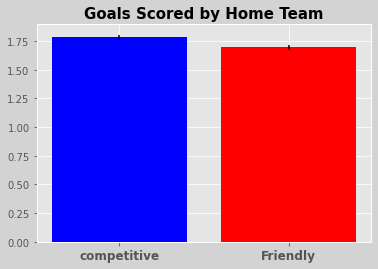

In [25]:
ci5 = confidence_interval(competitive['home_score'])
ci6 = confidence_interval(friendly['home_score'])

fig, ax = plt.subplots()

plt.style.use('ggplot')

plt.bar(0, height=ci5[1], yerr=ci5[3], color='b')
plt.bar(1, height=ci6[1], yerr=ci6[3], color='r')

ax.set_xticks([0, 1])
ax.set_xticklabels(['competitive', 'Friendly'], fontsize=12, fontweight='bold')

ax.set_title('Goals Scored by Home Team', fontsize=15, fontweight='bold')

fig.set_facecolor('lightgrey')

plt.show()

##Competitive Games vs Friendly Games: Goal Difference
1) Null Hypothesis:

$H_0: \overline{x}_c == \overline{x}_f$

The home team of competitive games wins by a similar margin as the home team of friendly games.

2) Alternative Hypothesis:

$H_0: \overline{x}_c \neq \overline{x}_f$

There is a significant difference in the winning margin of home teams of competitive games and home teams of friendly games.

3) Confidence Interval:

95%

In [23]:
ts6, pv6 = stats.ttest_ind(competitive['goal_difference'], friendly['goal_difference'])
print('T-statistic:', ts6)
print('P-value:', pv6)

T-statistic: 4.875155429114991
P-value: 1.0912320863740004e-06


4) Conclusion:
Based on a t-statistic of 4.88 and a p-value of 1.09e-6, we can reject the null hypothesis and suggest the alternative that home teams of competitive games win by a significantly larger margin than home teams of friendly games.

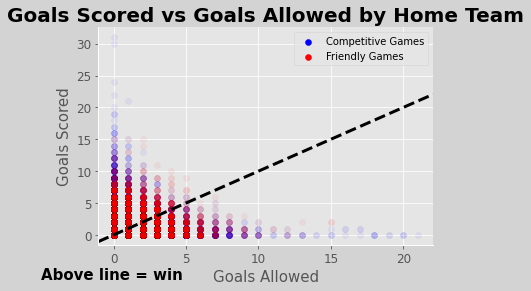

In [24]:
#graphing differences in goals scored vs goals allowed of competitive and friendly games
fig, ax = plt.subplots()

plt.scatter(competitive['away_score'], competitive['home_score'], alpha=0.05, c='b', label='Competitive Games')
plt.scatter(friendly['away_score'], friendly['home_score'], alpha=0.05, c='r', label='Friendly Games')

xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

ax.set_yticklabels([-5, 0, 5, 10, 15, 20, 25, 30], fontsize=12)
ax.set_ylabel('Goals Scored', fontsize=15)

ax.set_xticklabels([-5, 0, 5, 10, 15, 20], fontsize=12)
ax.set_xlabel('Goals Allowed', fontsize=15)

fig.set_facecolor('lightgrey')

legend = plt.legend(loc='upper right')
for handle in legend.legendHandles:
  handle.set_alpha(1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Goals Scored vs Goals Allowed by Home Team', fontsize=20, fontweight='bold')
ax.text(-5, -7, 'Above line = win', fontsize=15, fontweight='bold')

plt.show()